In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
iris = datasets.load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
X = iris.data[50:,0]
Y = iris.data[50:,1]

In [8]:
Y

array([3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2,
       2.9, 2.9, 3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. ,
       2.8, 3. , 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. ,
       2.5, 2.6, 3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7,
       3. , 2.9, 3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8,
       3.2, 3. , 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. ,
       2.8, 3. , 2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1,
       3.1, 2.7, 3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [9]:
EPOCHS = 20
LEARNING_RATE = 0.0001

In [10]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])**2
        return total_cost /(2*len(X))

In [11]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
        return total_cost/(len(X))

In [12]:
def der_theta1(X,y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost/(len(X))

In [13]:
theta0 = 1
theta1 = 1
for _ in range(EPOCHS):
    dt0 = der_theta0(X,Y,theta0,theta1)
    dt1 = der_theta1(X,Y,theta0,theta1)
    
    theta0 = theta0 - LEARNING_RATE*dt0
    theta1 -= LEARNING_RATE*dt1
    
    print("t0:", theta0, "t1:",theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 0.9999952 t1: 0.99721958 cost: 0.1142674434445035
t0: 0.9999904194677399 t1: 0.9944501867037592 cost: 0.11334235269405278
t0: 0.9999856583260135 t1: 0.9916917763808529 cost: 0.11242466831743997
t0: 0.9999809164979205 t1: 0.9889443054742855 cost: 0.11151433135523106
t0: 0.9999761939068658 t1: 0.9862077305998023 cost: 0.11061128331602613
t0: 0.9999714904765576 t1: 0.983482008545205 cost: 0.10971546617274877
t0: 0.9999668061310073 t1: 0.9807670962696688 cost: 0.10882682235896585
t0: 0.9999621407945273 t1: 0.9780629509030635 cost: 0.10794529476523562
t0: 0.9999574943917302 t1: 0.9753695297452756 cost: 0.10707082673548506
t0: 0.9999528668475276 t1: 0.9726867902655346 cost: 0.1062033620634159
t0: 0.9999482580871288 t1: 0.9700146901017415 cost: 0.10534284498893902
t0: 0.9999436680360401 t1: 0.9673531870597996 cost: 0.10448922019463763
t0: 0.9999390966200626 t1: 0.9647022391129482 cost: 0.10364243280225732
t0: 0.9999345437652922 t1: 0.9620618044010992 cost: 0.10280242836922505
t0: 0.999930

In [14]:
cost_function(X,Y,10,10)

29.4912

In [15]:
EPOCHS = 80
LEARNING_RATE = 0.001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1]*X
    preds.append(predictions)
    
    cost = np.sum(np.square(predictions - Y))/(2*len(predictions))
    costs.append(cost)
    params[0] -= LEARNING_RATE * np.sum(predictions - Y)/len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y)*X)/len(predictions)

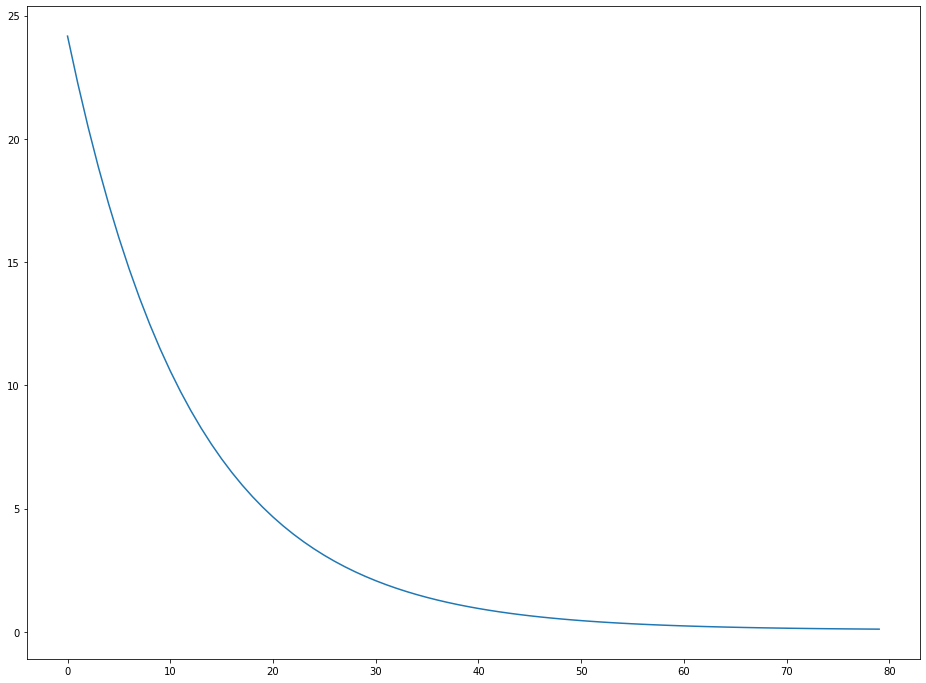

In [16]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

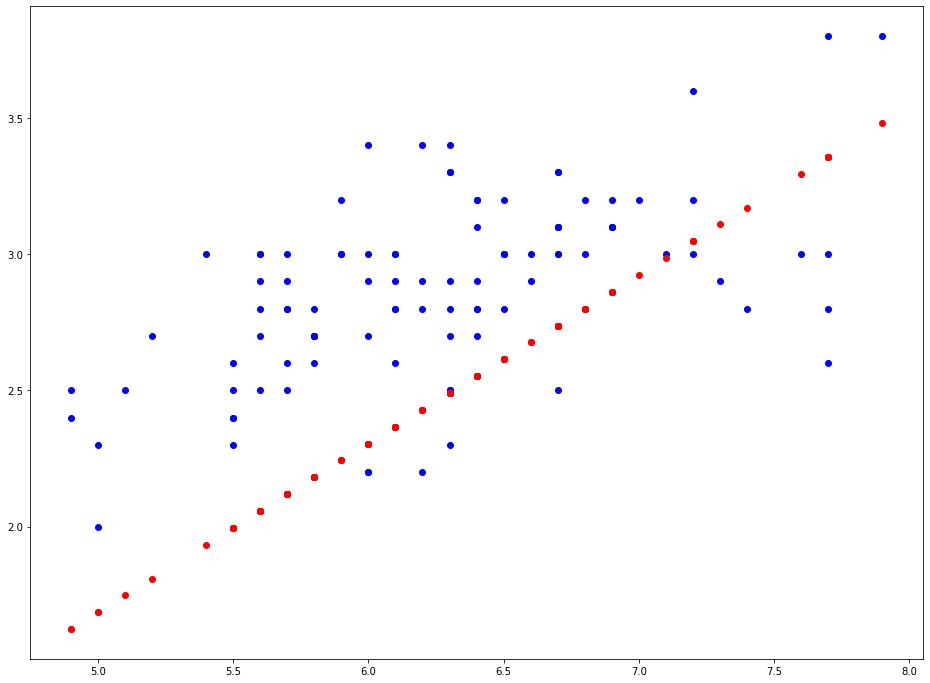

In [17]:
plt.figure(figsize = (16,12))
plt.scatter(X,Y,color = 'blue')
plt.scatter(X,preds[70],color = 'red')
plt.show()

In [18]:
params

array([-1.40670564,  0.6390392 ])